<a href="https://colab.research.google.com/github/NandikollaSatyaSuryakiran/FMML_LABS-AND-ASSIGNMENTS/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=46ec36396523ffced54e9ef21a2892290fc449925d8f90f8d9ca6c976615af7f
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [3]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [5]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [6]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [7]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

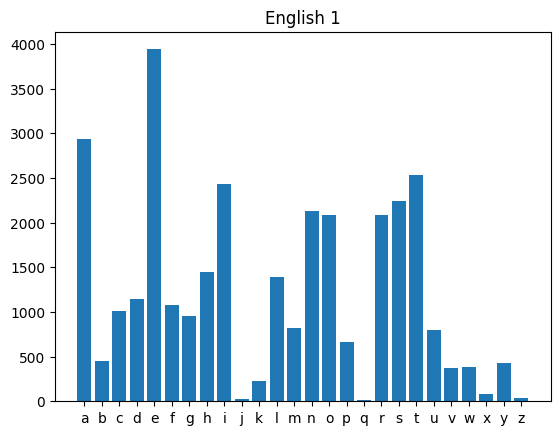

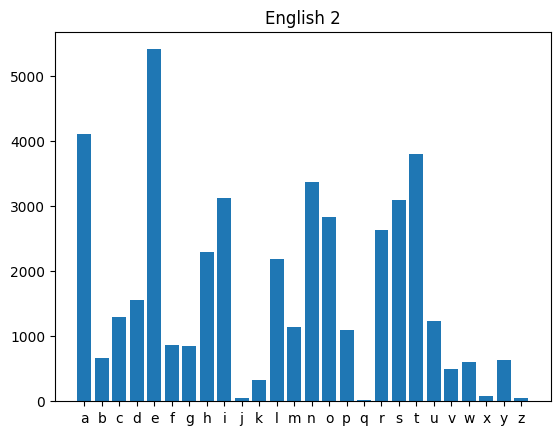

In [8]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

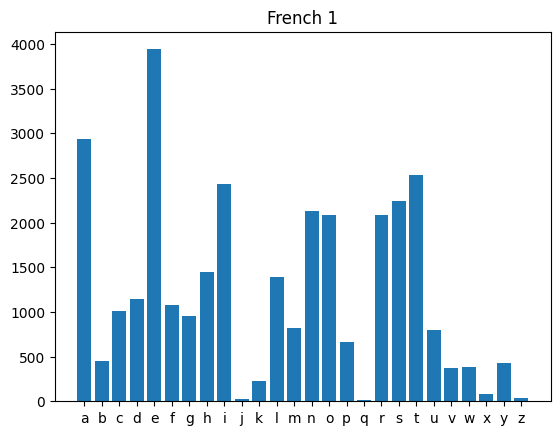

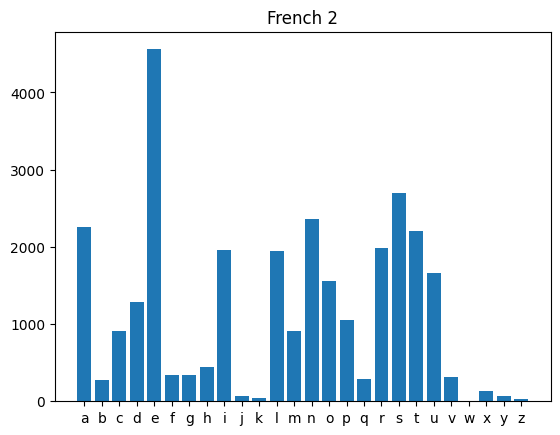

In [9]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

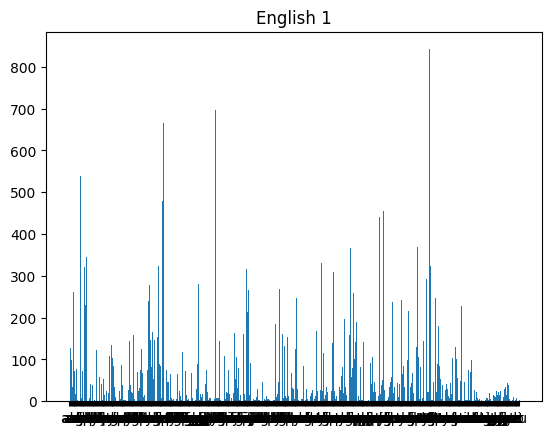

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1.Which is the best combination of features in python? The "best" combination of features in Python depends on what you're trying to accomplish. Python is a versatile programming language with a wide range of features and libraries that can be combined in various ways to solve different types of problems. Here are some common feature combinations in Python based on specific use cases:

Web Development: Django or Flask for web frameworks. HTML/CSS for front-end development. Database integration with SQL or NoSQL databases. Libraries like SQLAlchemy, Django ORM, or PyMongo for database access. RESTful APIs using Flask-RESTful or Django REST framework. JavaScript for client-side interactivity (e.g., React, Vue.js).

Data Science and Machine Learning: Libraries like NumPy, Pandas, and Matplotlib for data manipulation and visualization. Scikit-Learn for machine learning algorithms. Jupyter Notebooks for interactive data analysis. TensorFlow or PyTorch for deep learning. SciPy for scientific and technical computing. Tools like Seaborn and Plotly for advanced data visualization.

Automation and Scripting: Standard library modules for file handling, regular expressions, and system operations. Third-party packages like Requests for making HTTP requests. Automation libraries like Selenium for web scraping or automation tasks. GUI development with libraries like Tkinter or PyQt.

DevOps and System Administration: Shell scripting for automation. Configuration management tools like Ansible. Containerization with Docker. Web frameworks like Flask for building internal tools. Cloud services and SDKs for cloud automation (e.g., AWS Boto3, Google Cloud SDK).

Game Development: Pygame for 2D game development. Pyglet or Panda3D for 3D game development. Libraries like NumPy for game physics. Game engines like Godot (with Python support) for more advanced projects.

Scientific Computing: Libraries like SciPy, SymPy, and networkx for various scientific applications. Jupyter Notebooks for interactive research and documentation.

Data Analysis and Visualization: Libraries like Plotly, Seaborn, and Bokeh for interactive data visualization. Statistical analysis with SciPy and statsmodels. Data cleaning and manipulation with Pandas.

Natural Language Processing (NLP): NLTK and spaCy for NLP tasks. Libraries like Gensim for topic modeling. Transformers library (Hugging Face) for state-of-the-art NLP models.

IoT (Internet of Things): MicroPython or CircuitPython for embedded systems. Libraries like Adafruit CircuitPython for hardware interfacing. MQTT or CoAP for IoT communication. Ultimately, the best combination of features in Python will depend on your specific project and requirements. Python's strength lies in its flexibility and rich ecosystem of libraries, which allows you to choose the right combination of tools and features to suit your needs.

2.How would you test or visualize four or more features?

The "best" combination of features in Python can vary greatly depending on the specific task or problem you're trying to solve. Python is a versatile programming language with a rich ecosystem of libraries and features, and the best combination will depend on your particular use case. Here are some popular combinations of features and libraries in Python for different purposes:

Web Development: Flask or Django for web framework. SQLAlchemy or Django ORM for database access. HTML/CSS/JavaScript for frontend development. RESTful API design using Flask-RESTful or Django REST framework. Data Analysis and Scientific Computing:

NumPy for numerical computations

User 2. How would you test or visualize four or more features? ChatGPT Visualizing four or more features in your data can be challenging because it's difficult to represent multiple dimensions on a 2D or 3D plot. However, there are several techniques and tools you can use to explore and visualize high-dimensional data:

Pair Plots or Scatterplot Matrices: Use libraries like Seaborn or Pandas to create pair plots or scatterplot matrices. These plots display pairwise relationships between features in a grid of subplots. While they can only show relationships between two features at a time, they are useful for identifying potential correlations or patterns.

Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) can help reduce the dimensionality of your data to two or three dimensions, which can then be easily visualized in a scatter plot.

Parallel Coordinates: Parallel coordinates plots can be used to visualize high-dimensional data. Each feature is represented as a vertical axis, and a line is drawn connecting the values of each data point across these axes.

3D Scatter Plots: When you have four features, you can create a 3D scatter plot. Matplotlib and Plotly are popular libraries for creating 3D plots. You can choose three features for the X, Y, and Z axes and represent the fourth feature with the color or size of the data points.

Heatmaps and Correlation Matrices: Create heatmaps or correlation matrices to visualize the relationships between multiple features simultaneously. These visualizations can help you identify which features are strongly correlated with each other.

Interactive Visualizations: Use interactive visualization libraries like Plotly or Bokeh. These libraries allow you to create interactive plots that can display multiple features and provide tooltips for detailed information.

3D Surface Plots: If you have more than four features and want to visualize them together, you can consider 3D surface plots or contour plots. These can provide insights into the relationships between multiple features.

Hierarchical Clustering and Dendrogram: Cluster your data using # clustering and create a dendrogram to visualize the hierarchical structure of your data. This can help identify groups or clusters of data points based on the features. Remember that the choice of visualization technique depends on the nature of your data and the specific insights you want to gain. Experiment with different visualization methods to find the one that best suits your needs for understanding the relationships between multiple features in your dataset.

3.Can you come up with your own features? Yes, you can create your own features in Python by defining functions, classes, or modules that provide new functionality or extend existing ones. Here are a few ways to do this:

Custom Functions:
You can create custom functions to encapsulate specific operations or calculations. For example:

python def calculate_area_of_circle(radius): return 3.14159 * radius ** 2

Custom Classes:
You can define custom classes to represent objects with specific behaviors and attributes. For example:

python class Person: def init(self, name, age): self.name = name self.age = age

def greet(self): return f"Hello, my name is {self.name} and I am {self.age} years old."

Custom Modules:
You can create custom modules by organizing related functions, classes, and variables into separate Python files. Then, you can import and use them in other scripts. For example:

python

mymodule.py def custom_function(): return "This is a custom function."

class CustomClass: def init(self, value): self.value = value

In another script, you can import and use the custom module:

python import mymodule

result = mymodule.custom_function() obj = mymodule.CustomClass(42)

Decorators:
Decorators allow you to modify the behavior of functions or methods. You can create your own decorators to add custom functionality to existing functions. For example:

python def my_custom_decorator(func): def wrapper(args, kwargs): print("Before function execution") result = func(args, **kwargs) print("After function execution") return result return wrapper

@my_custom_decorator def my_function(): print("Inside my_function")

my_function()

Custom Context Managers:
You can define custom context managers using the contextlib module to manage resources or state within a with block. For example:

python from contextlib import contextmanager

@contextmanager def my_custom_context_manager(): print("Entering the context") yield print("Exiting the context")

with my_custom_context_manager(): print("Inside the context")

Few examples of how you can create custom features in Python to extend its functionality according to your specific needs. Python's flexibility and extensibility make it a powerful language for building custom solutions.

4.Will these features work for different classes other than 0 and 1? It appears that you're asking about features or code related to a specific problem or context, but you haven't provided enough details for me to give you a specific answer. Features or code can work for different classes in Python depending on how they are implemented.

Here are some general principles to consider: Modularity: If you're writing code or defining features, try to make them as modular and reusable as possible. This will make it easier to adapt them for different classes or problems.

Generalization: When designing features or code, think about whether they are specific to the classes 0 and 1 or if they can be generalized to handle a wider range of classes. For example, if you're working on a classification problem, make sure your code can handle multiple classes, not just 0 and 1.

Testing and Validation: Test your features or code with different class labels to ensure they work as expected. This will help you identify any issues or limitations when using them with different classes.

link textFlexibility: Build flexibility into your code by using variables or parameters that can be easily adjusted to accommodate different classes or problem settings.

5.What will happen if we take more that two classes at a time? In Python, when you refer to "classes," you're likely talking about object-oriented programming (OOP) classes, which are used to create objects and define their behavior. Python allows you to define and work with multiple classes in a single script or module, and there is no strict limit on the number of classes you can define in a Python program.

If you create and use more than two classes in your Python code, it's perfectly fine and a common practice in many software projects. Each class represents a blueprint for objects, and you can use these classes to model and manipulate different components or entities in your program.

Here are some key points to consider when working with multiple classes in Python:

Organization: Using multiple classes helps you organize your code, making it more modular and maintainable. Each class should have a specific responsibility or role within your program.

Inheritance: Python supports class inheritance, which means you can create subclasses that inherit attributes and methods from a parent class. This allows you to create hierarchies of classes to represent more complex relationships between objects.

Composition: You can create classes that use instances of other classes as attributes. This is known as composition and allows you to build complex objects by combining simpler ones.

Encapsulation: Classes provide a way to encapsulate data and behavior, which can help you achieve data hiding and abstraction.

Code Reusability: Using multiple classes allows you to reuse code across different parts of your program, which can save you time and reduce redundancy.

Here's a simple example demonstrating the use of three classes in Python:

python Copy code class Person: def init(self, name): self.name = name

def introduce(self): print(f"My name is {self.name}.")

class Car: def init(self, make, model): self.make = make self.model = model

def display_info(self): print(f"This is a {self.make} {self.model}.")

class Student: def init(self, name, student_id): self.name = name self.student_id = student_id

def display_info(self): print(f"Student: {self.name}, ID: {self.student_id}")

Creating instances of the classes person = Person("Alice") car = Car("Toyota", "Camry") student = Student("Bob", "12345")

Using the methods of the classes person.introduce() car.display_info() student.display_info() In this example, we have defined three classes: Person, Car, and Student, each with its own attributes and methods. You can create instances of these classes and use their methods to perform specific tasks or operations.